# PROJECT - UNSUPERVISED LEARNING

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

In [2]:
#Read the data as dataframe
vehicle_data = pd.read_csv('vehicle.csv')

In [3]:
#checking data on top
vehicle_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
#checking bottom data
vehicle_data.tail()

compactness  circularity  distance_circularity  radius_ratio  \
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   
843                         70.0             3.0               4.0   
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about.2  hollows_ratio class  
841             188.0            195   car  
842             186.0            197   van  
843             187.0            201   car  
844             190.0            195   car  
845             186.0            190   van

In [5]:
#checking shape of data
vehicle_data.shape

(846, 19)

In [6]:
#checking datatype and number of each attribute
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

There is difference in the number of entries in each column. Could be due to missing values. The data type is numeric (int/float) for all the columns except class which is object.

In [7]:
# changing the datatype of class from object to categrical and label encoding it
vehicle_data['class'] = pd.Categorical(vehicle_data['class'])
label_encoder = preprocessing.LabelEncoder()
vehicle_data['class'] = label_encoder.fit_transform(vehicle_data['class'])
vehicle_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
4             180.0            183      0

In [8]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [9]:
#Checking missing values
vehicle_data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
#dropping rows with missing values as other approaches would hinder data recognition with wrong values
vehicle_data.dropna(inplace=True)

In [11]:
#checking for missing values again
vehicle_data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [12]:
#checking number of each attribute again
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [13]:
#Also checking shape again
vehicle_data.shape

(813, 19)

From the above:

1. The original data had 846 rows and 19 columns.
2. The data type of all the independent variables is integer or float and the dependent variable 'class' is an object.
3. It was observed there were missing values after checking as count of rows of each attribute was slightly different than the other.
4. The approach taken here was to delete the rows with missing values. This approach was taken as introducing another value (mean/median/0) would affect our analysis in such a way that it may give wrong prediction due to this value introduced ie mean value put in for radius_ratio of van may not be anythig near to van's radius_ratio. Hence, the approach.
5. Now the data has 813 rows and 19 columns.

In [14]:
vehicle_data['class'].value_counts()

1    413
0    205
2    195
Name: class, dtype: int64

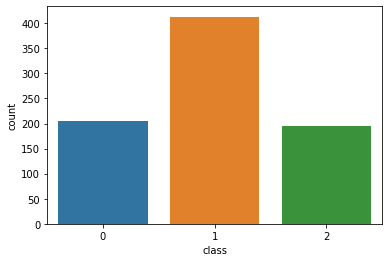

In [15]:
sns.countplot(vehicle_data['class'])

The count inicates that there are almost same number of van and buses but double the number for car. This is because there are two varities of cars considered here.

In [16]:
#5 point summary
vehicle_data.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   813.000000   813.000000             813.00000    813.000000   
mean     93.656827    44.803198              82.04305    169.098401   
std       8.233751     6.146659              15.78307     33.615402   
min      73.000000    33.000000              40.00000    104.000000   
25%      87.000000    40.000000              70.00000    141.000000   
50%      93.000000    44.000000              79.00000    167.000000   
75%     100.000000    49.000000              98.00000    195.000000   
max     119.000000    59.000000             112.00000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            813.000000               813.000000     813.000000   
mean              61.774908                 8.599016     168.563346   
std                7.973000                 4.677174      33.082186   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     146.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count      813.00000              813.000000                 813.000000   
mean        40.98893               20.558426                 147.891759   
std          7.80338                2.573184                  14.504648   
min         26.00000               17.000000                 118.000000   
25%         33.00000               19.000000                 137.000000   
50%         43.00000               20.000000                 146.000000   
75%         46.00000               23.000000                 159.000000   
max         61.00000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       813.000000         813.000000                 813.000000   
mean        188.377614         438.382534                 174.252153   
std          31.165873         175.270368                  32.332161   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         364.000000                 173.000000   
75%         217.000000         586.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   813.000000      813.000000        813.000000   
mean                     72.399754        6.351784         12.687577   
std                       7.475994        4.921476          8.926951   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          6.000000   
50%                      71.000000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio       class  
count        813.000000     813.000000  813.000000  
mean         188.979090     195.729397    0.987700  
std            6.153681       7.398781    0.701754  
min          176.000000     181.000000    0.000000  
25%          184.000000     191.000000    0.000000  
50%          189.000000     197.000000    1.000000  
75%          193.000000     201.000000    1.000000  
max          206.000000     211.000000    2.000000

C:\Users\mpani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\mpani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


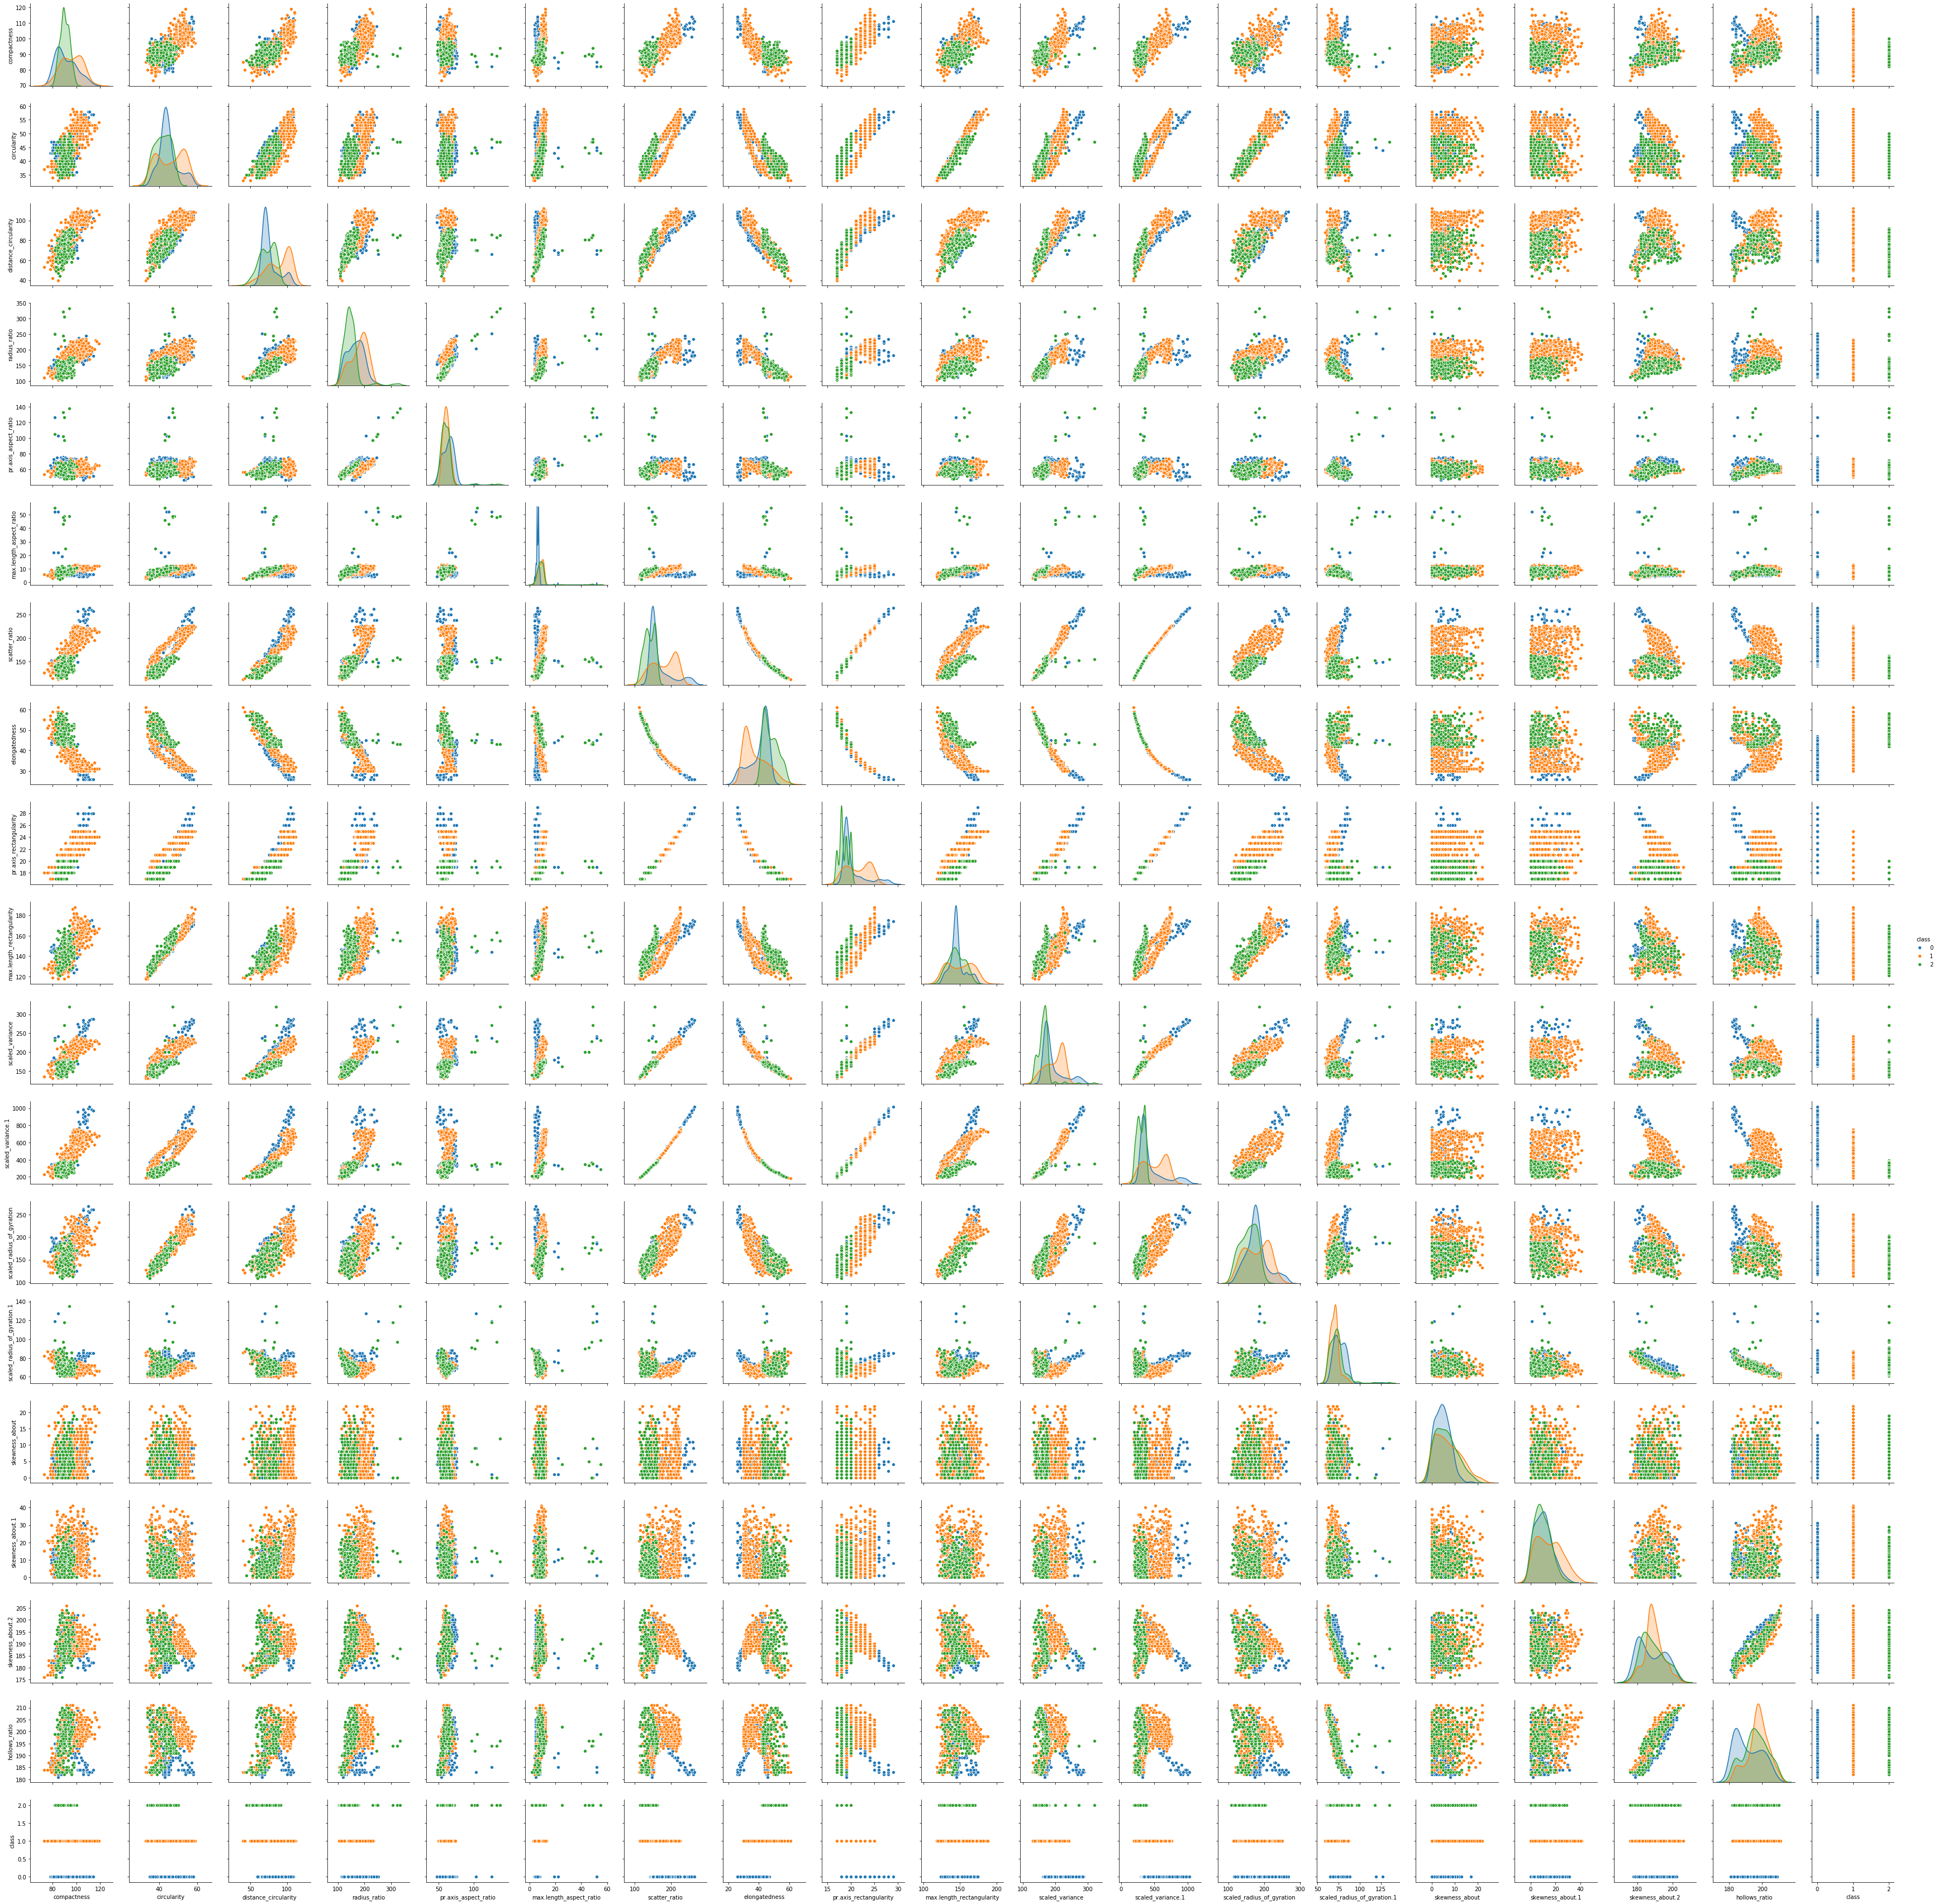

In [17]:
#pair plot for the attributes
sns.pairplot(vehicle_data, hue ="class")

In [18]:
# checking skewness of data
vehicle_data.skew()

compactness                    0.386048
circularity                    0.272723
distance_circularity           0.114244
radius_ratio                   0.396129
pr.axis_aspect_ratio           3.832899
max.length_aspect_ratio        6.698420
scatter_ratio                  0.596913
elongatedness                  0.053941
pr.axis_rectangularity         0.759483
max.length_rectangularity      0.271183
scaled_variance                0.629144
scaled_variance.1              0.822734
scaled_radius_of_gyration      0.266943
scaled_radius_of_gyration.1    2.156717
skewness_about                 0.782756
skewness_about.1               0.671462
skewness_about.2               0.255880
hollows_ratio                 -0.229941
class                          0.016994
dtype: float64

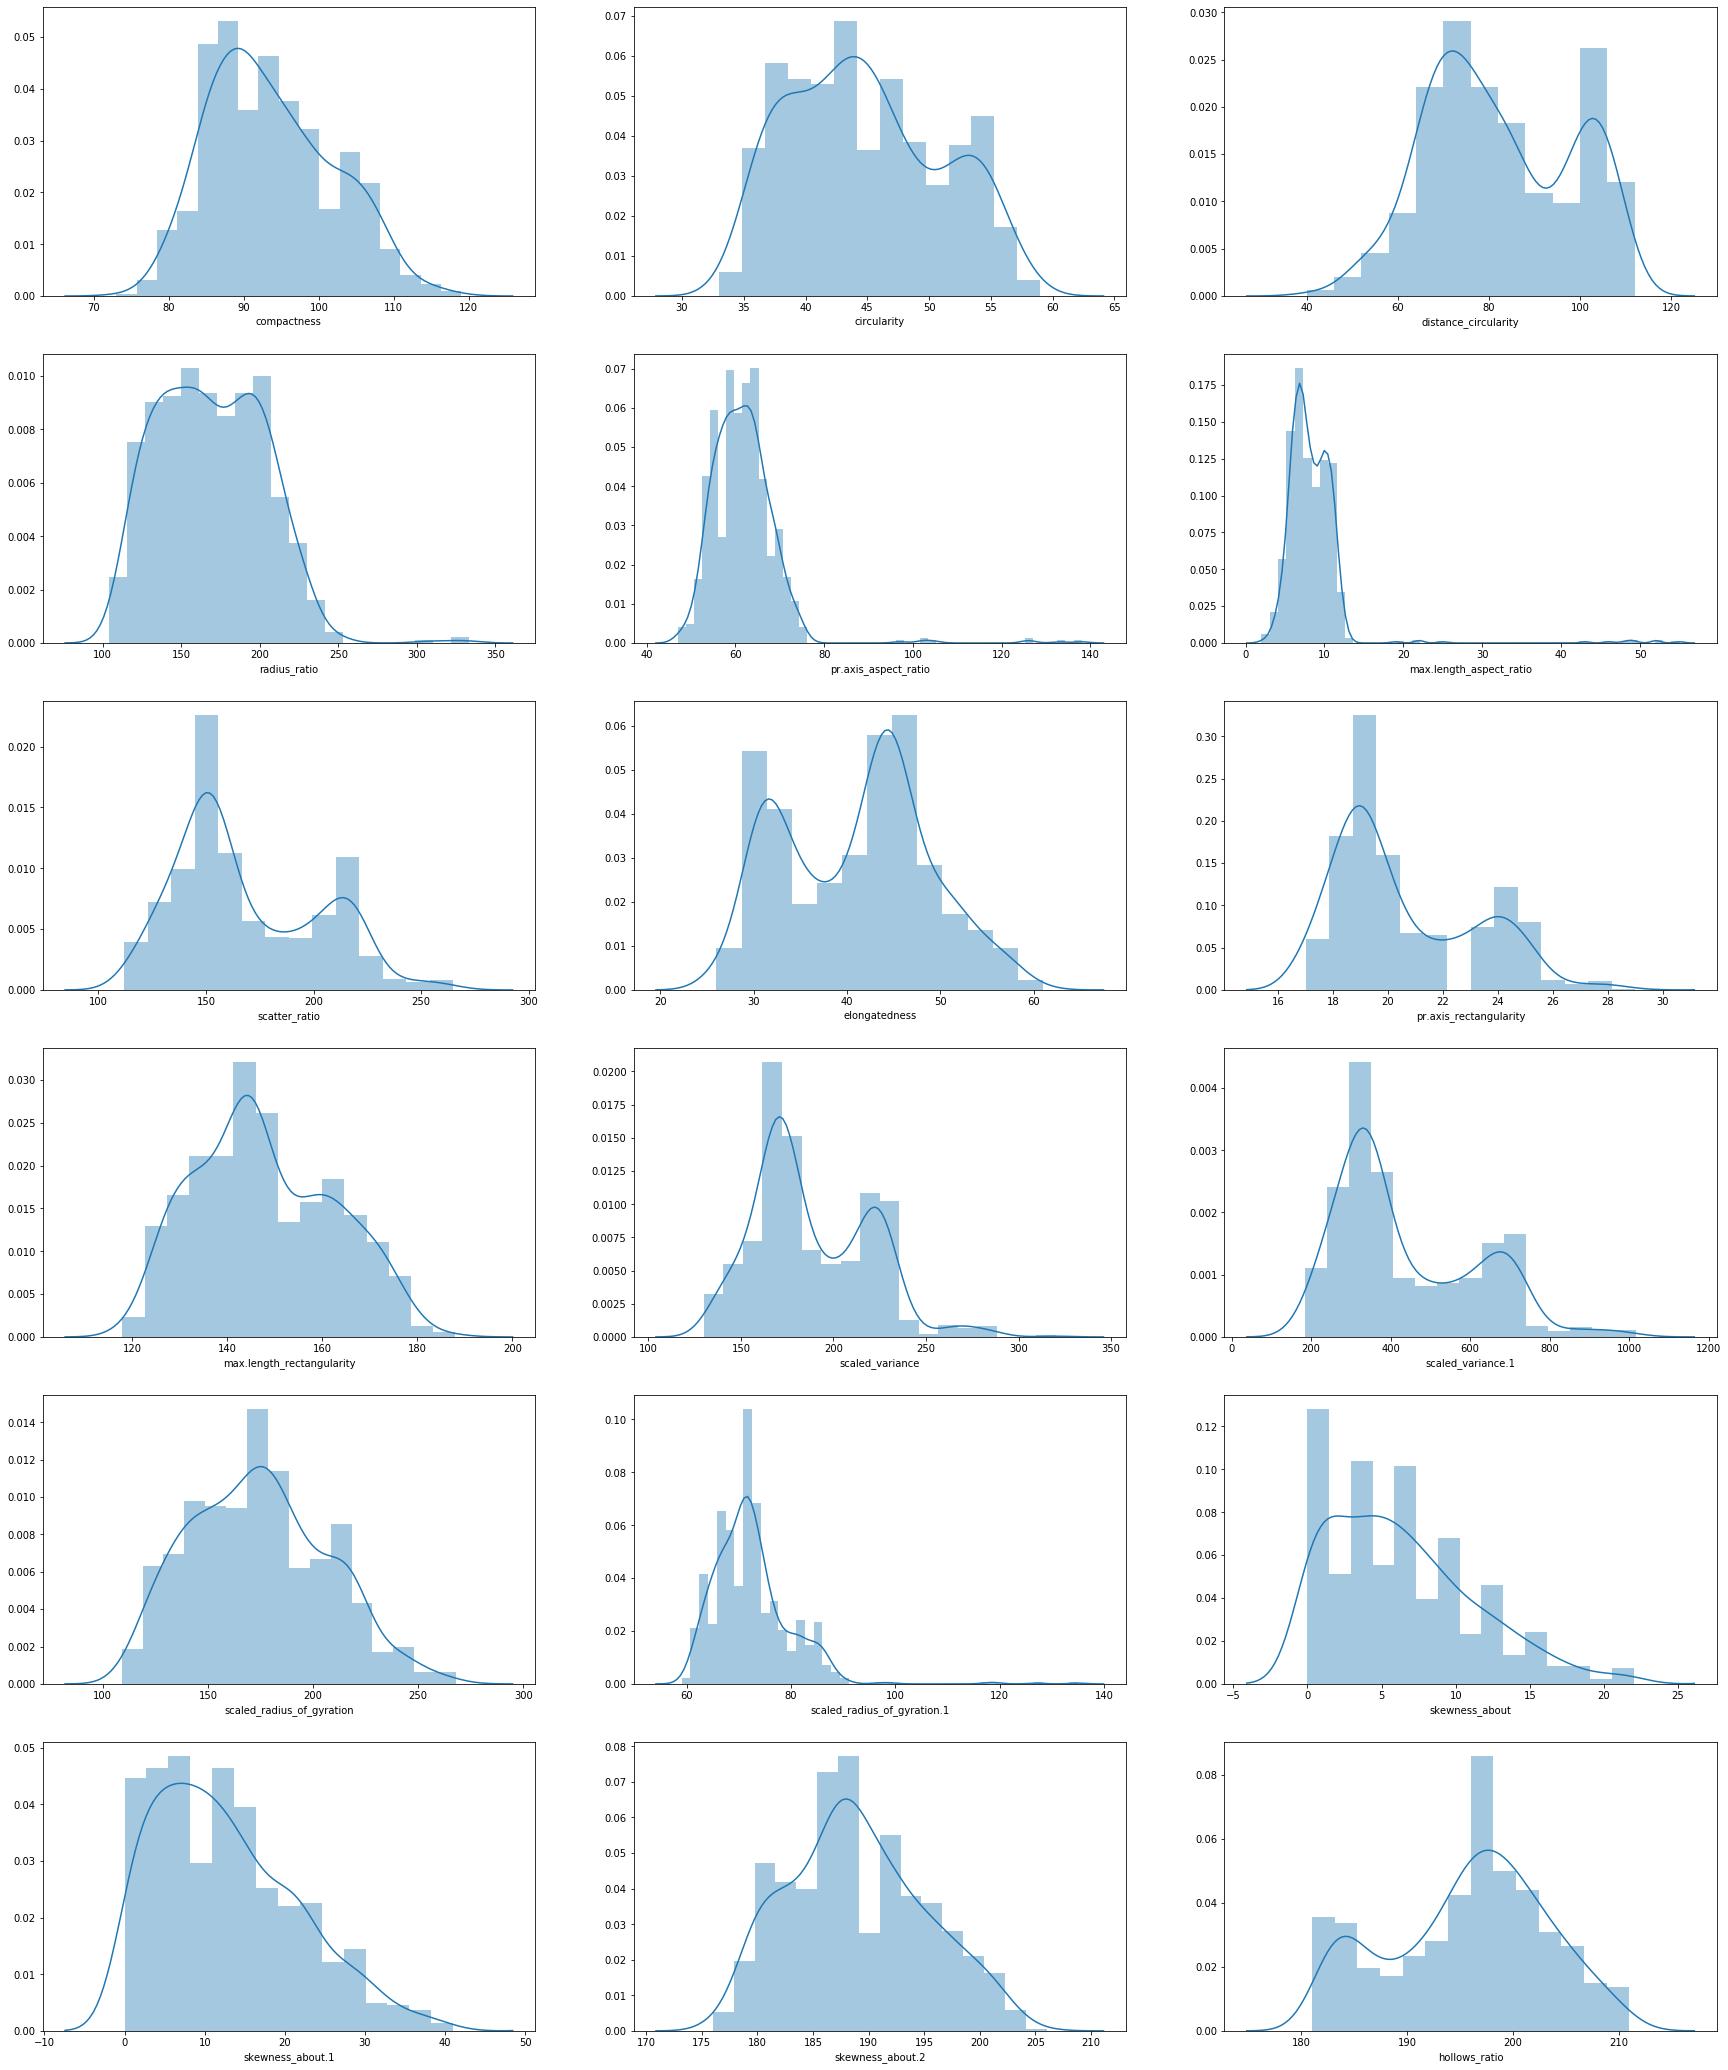

In [19]:
#independant variables
A = vehicle_data.drop(['class'], axis=1)

#univariate plot
plt.figure(figsize=(30,50))
pos = 1
for feature in A.columns:
    plt.subplot(8,3, pos)
    sns.distplot(A[feature], kde = True)
    pos +=1

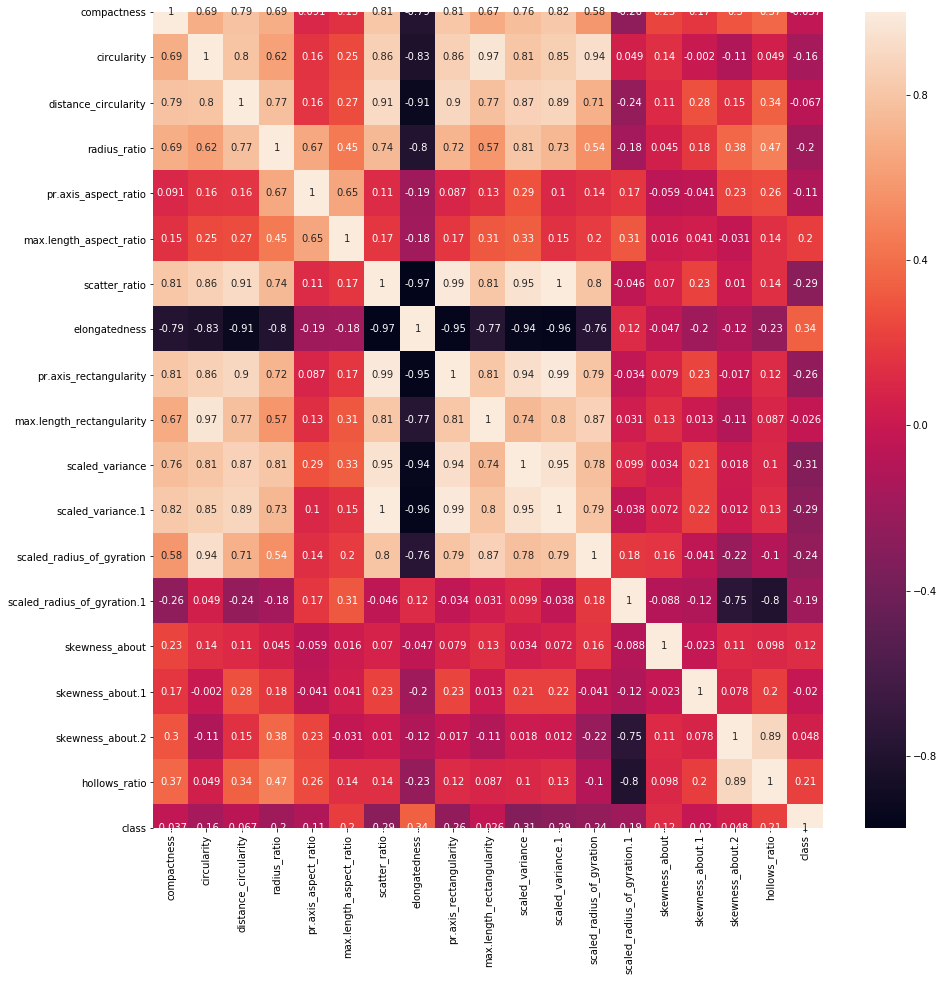

In [20]:
#Correlation matrix for attributes
Corr = vehicle_data.corr()
figure (figsize = (15,15))
sns.heatmap(Corr, annot = True)

The following have been observed from the above pairplot, histograms, heatmap and summary:
1. The presence of multiple gaussians may mean data was consolitaled from multiple data sets. Most of the distribution show 2 or 3 peaks which means that there could be 3 or more clusters. Here we know there are 4 different types of vehicles but there are three categories in class.
2. Here compactness, circularity, distance_circularity, radius_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, pr.axis_aspect_ratio, max.length_aspect_ratio are all positive or right skewed.
3. There is high correlation between:
    A. pr.axis_rectangularity and scatter_ratio : 0.99
    B. scaled_variance.1 and scatter_ratio : 1
    C. scaled_variance.1 and pr.axis_rectangularity : 0.99
4. Since all the 3 attributes pr.axis_rectangularity, scatter_ratio and scaled_variance.1 have high correlation with each other, we have to consider only one of these. Thus, considering only pr.axis_rectangularity and dropping other 2 attributes viz scaled_variance.1 and scatter_ratio. 

In [21]:
# Dropping scaled_variance.1 and scatter_ratio according to analysis
vehicle_data.drop(['scaled_variance.1', 'scatter_ratio'], axis=1, inplace=True)

In [22]:
vehicle_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  elongatedness  \
0                  72.0                       10           42.0   
1                  57.0                        9           45.0   
2                  66.0                       10           32.0   
3                  63.0                        9           46.0   
4                 103.0                       52           45.0   

   pr.axis_rectangularity  max.length_rectangularity  scaled_variance  \
0                    20.0                        159            176.0   
1                    19.0                        143            170.0   
2                    23.0                        158            223.0   
3                    19.0                        143            160.0   
4                    19.0                        144            241.0   

   scaled_radius_of_gyration  scaled_radius_of_gyration.1  skewness_about  \
0                      184.0                         70.0             6.0   
1                      158.0                         72.0             9.0   
2                      220.0                         73.0            14.0   
3                      127.0                         63.0             6.0   
4                      188.0                        127.0             9.0   

   skewness_about.1  skewness_about.2  hollows_ratio  class  
0              16.0             187.0            197      2  
1              14.0             189.0            199      2  
2               9.0             188.0            196      1  
3              10.0             199.0            207      2  
4              11.0             180.0            183      0

# Splitting the data

In [23]:
#Normalising the data
X = vehicle_data.drop('class', axis =1)
Y = vehicle_data['class']
XScaled = X.apply(zscore)

#splitting the data to train and test
x_train, x_test, y_train, y_test = train_test_split(XScaled, Y, test_size = 0.3, random_state=1 )
x_train.head()

compactness  circularity  distance_circularity  radius_ratio  \
433    -1.052030    -0.456333             -0.763506     -1.163826   
129     0.770861     0.520408              0.821445      1.187734   
90      1.256966     1.659939              1.582222      1.574700   
459     0.527809    -0.456333              0.504455      0.681702   
734    -0.687452    -0.781913             -1.714476     -1.640091   

     pr.axis_aspect_ratio  max.length_aspect_ratio  elongatedness  \
433             -0.724754                -0.342087       0.514333   
129              0.781252                -0.342087      -1.152637   
90               0.781252                 0.513657      -1.280865   
459             -0.097251                 0.085785      -0.511494   
734             -1.101255                -0.342087       1.540161   

     pr.axis_rectangularity  max.length_rectangularity  scaled_variance  \
433               -0.606014                  -0.199490        -0.365291   
129                0.949438                   0.145439         0.886848   
90                 1.338300                   1.732113         1.400546   
459                0.171712                  -0.268476         0.019982   
734               -0.994877                  -0.613406        -1.489006   

     scaled_radius_of_gyration  scaled_radius_of_gyration.1  skewness_about  \
433                  -0.069700                     1.284933        0.741741   
129                   0.796844                     0.080339        0.131793   
90                    1.694336                    -0.187348       -0.681472   
459                  -1.121931                    -1.525787       -0.681472   
734                  -0.502972                     1.954153       -1.291420   

     skewness_about.1  skewness_about.2  hollows_ratio  
433          0.147109         -1.297435      -1.451050  
129         -0.189159          0.491213      -0.233885  
90          -0.301249         -0.159204       0.442318  
459         -0.525427          1.629444       1.659484  
734         -0.637516         -2.110457      -1.721531

# SVM Model

In [24]:
#fitting svm model
model1 = SVC()
model1.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
model1.score(x_test, y_test)

0.9631147540983607

In [26]:
#Store the accuracy in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['SVM'], 'Accuracy': 96.3})
resultsDf = resultsDf[['Method', 'Accuracy']]
resultsDf

Method  Accuracy
0    SVM      96.3

# K fold cross validation

In [27]:
#fitting svm model with k fold cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
model = SVC()
results = cross_val_score(model, XScaled, Y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.97560976 0.98780488 0.93902439 0.97530864 0.96296296 0.98765432
 0.96296296 0.95061728 0.9382716  0.95061728]
Accuracy: 96.308% (1.740%)


In [28]:
#Store the accuracy in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['K fold with SVM'], 'Accuracy': 96.3})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy']]
resultsDf

Method  Accuracy
0              SVM      96.3
0  K fold with SVM      96.3

Here, we observe that the accuracy remains the same for SVM or SVM with cross validation. Thus, the SVM model is giving a good prediction.

# PCA Analysis

In [29]:
#covariance matrix
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00123153  0.69073497  0.79092746  0.68897729  0.09066804  0.1505537
  -0.78902127  0.81522961  0.67573322  0.76532752  0.58212123 -0.25875528
   0.23193313  0.16859183  0.29656022  0.3732647 ]
 [ 0.69073497  1.00123153  0.79868656  0.62471862  0.15521415  0.25192897
  -0.8261242   0.85719089  0.96655501  0.80710097  0.93674669  0.0491303
   0.1419004  -0.00197723 -0.1140426   0.04939203]
 [ 0.79092746  0.79868656  1.00123153  0.77235395  0.16358689  0.26591783
  -0.9138366   0.89836576  0.77441118  0.86674929  0.70655787 -0.23843852
   0.11041593  0.278193    0.14543699  0.34365085]
 [ 0.68897729  0.62471862  0.77235395  1.00123153  0.66819724  0.45301698
  -0.79674104  0.71709175  0.57118076  0.80778118  0.54530637 -0.17556405
   0.04474816  0.17829807  0.37605357  0.47147529]
 [ 0.09066804  0.15521415  0.16358689  0.66819724  1.00123153  0.6528959
  -0.19142882  0.08709873  0.13371753  0.29073296  0.1358303   0.17327362
  -0.05931667 -0.04081886  0.22998448  0.25788318]
 [ 0.150

In [30]:
#generating eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(covMatrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[ 3.05475064e-01 -1.14533873e-01 -1.43526688e-01  5.37789123e-02
   6.76314184e-02 -1.62095431e-01  5.33340842e-01 -4.96773731e-01
   4.50301600e-01 -2.58460029e-01  6.15518718e-02 -4.45199905e-02
   1.71253551e-01  4.04728133e-02 -3.71766903e-02 -1.72525738e-02]
 [ 3.27883496e-01  1.52574372e-01 -8.43032791e-02  1.52935254e-01
  -9.15789320e-02  2.38001371e-01 -2.35421566e-01 -1.82345002e-01
   1.77262095e-02  8.73224151e-02 -5.02809706e-02  1.05241085e-01
  -6.25381942e-02  6.84468795e-01  3.85556566e-01  2.05930001e-01]
 [ 3.39064857e-01 -5.66482252e-02 -8.47123161e-02 -1.03844400e-01
   3.03577169e-02  1.00285152e-01  7.20739879e-02  4.73323026e-01
   1.22082013e-01 -6.15051778e-02  7.13790772e-01  2.23443667e-01
  -4.72734125e-02 -1.85221370e-02  1.24182308e-01 -1.65975244e-01]
 [ 3.07546126e-01 -1.56597064e-01  2.67232081e-01 -4.13830944e-02
  -4.41319774e-02 -2.88142304e-01 -1.37125169e-01  1.19584884e-01
   2.05893879e-01 -4.91763748e-02 -1.76045060e-01  7.385771

In [31]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 47.48877283  66.04822255  77.69397467  84.83470275  90.6290834
  93.79877014  96.00505633  97.37278085  98.33563361  98.88342529
  99.23697753  99.50202399  99.69504341  99.81998729  99.91949202
 100.        ]


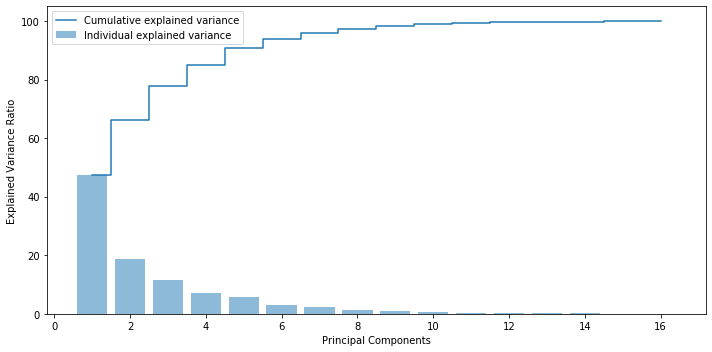

In [32]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

1. From PCA analysis we see that there are originally 16 Eigen values. 
2. Of these, the 7th onward don't seem to have much variance explained. 
3. Since, according to the questionnaire, we need to extract Principal Components that capture about 95% of the variance in the data, we can go with 7 principal components which capture 96% variance in data.

In [33]:
#dimensionality reduction taking 7 dimensions
pca1 = PCA(n_components=7)
pca1.fit(XScaled)
print(pca1.components_)
print(pca1.explained_variance_ratio_)

[[ 3.05475064e-01  3.27883496e-01  3.39064857e-01  3.07546126e-01
   1.09667923e-01  1.25027899e-01 -3.44734107e-01  3.41960171e-01
   3.15328934e-01  3.40618836e-01  3.00056402e-01 -3.41112026e-02
   4.92765265e-02  6.65508033e-02  4.64415311e-02  1.02593668e-01]
 [-1.14533873e-01  1.52574372e-01 -5.66482252e-02 -1.56597064e-01
  -7.99225980e-02  5.00274703e-02  6.78733943e-04  7.05373528e-02
   1.38541079e-01  7.85482265e-02  2.27149745e-01  4.98311220e-01
  -5.24102923e-02 -1.22563379e-01 -5.42879542e-01 -5.33145094e-01]
 [-1.43526688e-01 -8.43032791e-02 -8.47123161e-02  2.67232081e-01
   6.47330227e-01  5.76006653e-01  8.28542364e-02 -1.40660574e-01
  -7.22610254e-02  3.49662265e-02 -8.50381832e-02  2.70813256e-01
  -1.38759466e-01 -6.43107762e-02  4.47230537e-02  6.18688624e-02]
 [ 5.37789123e-02  1.52935254e-01 -1.03844400e-01 -4.13830944e-02
   6.90219219e-02  4.63970362e-02  1.10030008e-01 -1.22623743e-01
   1.52477934e-01 -1.37486975e-01  1.69500064e-01 -5.78598056e-02
   5.93

In [34]:
Xpca1 = pca1.transform(XScaled)
Xpca1

array([[ 0.61343596, -0.06226645,  0.84336484, ...,  0.05449904,
        -0.60908474, -0.88022635],
       [-1.3309514 , -0.44167092, -0.37074953, ...,  0.68236716,
        -0.54775991,  0.31200459],
       [ 3.42534258,  0.33351487, -0.08035799, ...,  0.74185776,
         0.70916181,  0.02881291],
       ...,
       [ 4.26951397,  0.15739727,  0.41285102, ..., -1.35112292,
        -0.26563205,  0.55910722],
       [-2.95926246, -1.10142372, -0.16519018, ...,  0.00708212,
        -0.34054376, -0.23991398],
       [-4.36651305,  0.19146998, -0.42498029, ..., -0.07641513,
        -0.31425481,  0.05541577]])

# Using PCA components for model building

# Splitting the data

In [35]:
#splitting the data to train and test
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(Xpca1, Y, test_size = 0.3, random_state=1 )
x_train.head()

compactness  circularity  distance_circularity  radius_ratio  \
433    -1.052030    -0.456333             -0.763506     -1.163826   
129     0.770861     0.520408              0.821445      1.187734   
90      1.256966     1.659939              1.582222      1.574700   
459     0.527809    -0.456333              0.504455      0.681702   
734    -0.687452    -0.781913             -1.714476     -1.640091   

     pr.axis_aspect_ratio  max.length_aspect_ratio  elongatedness  \
433             -0.724754                -0.342087       0.514333   
129              0.781252                -0.342087      -1.152637   
90               0.781252                 0.513657      -1.280865   
459             -0.097251                 0.085785      -0.511494   
734             -1.101255                -0.342087       1.540161   

     pr.axis_rectangularity  max.length_rectangularity  scaled_variance  \
433               -0.606014                  -0.199490        -0.365291   
129                0.949438                   0.145439         0.886848   
90                 1.338300                   1.732113         1.400546   
459                0.171712                  -0.268476         0.019982   
734               -0.994877                  -0.613406        -1.489006   

     scaled_radius_of_gyration  scaled_radius_of_gyration.1  skewness_about  \
433                  -0.069700                     1.284933        0.741741   
129                   0.796844                     0.080339        0.131793   
90                    1.694336                    -0.187348       -0.681472   
459                  -1.121931                    -1.525787       -0.681472   
734                  -0.502972                     1.954153       -1.291420   

     skewness_about.1  skewness_about.2  hollows_ratio  
433          0.147109         -1.297435      -1.451050  
129         -0.189159          0.491213      -0.233885  
90          -0.301249         -0.159204       0.442318  
459         -0.525427          1.629444       1.659484  
734         -0.637516         -2.110457      -1.721531

# SVM Model

In [36]:
#fitting svm model
model2 = SVC()
model2.fit(x_train_pca , y_train_pca)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
model2.score(x_test_pca, y_test_pca)

0.8811475409836066

In [38]:
#Store the accuracy in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVM using PCA'], 'Accuracy': 88.1})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy']]
resultsDf

Method  Accuracy
0              SVM      96.3
0  K fold with SVM      96.3
0    SVM using PCA      88.1

# K fold cross validation

In [39]:
#fitting svm model with k fold cross validation
kfold_pca = KFold(n_splits=10, shuffle=True, random_state=1)
model = SVC()
results_pca = cross_val_score(model, Xpca1, Y, cv=kfold_pca)
print(results_pca)
print("Accuracy: %.3f%% (%.3f%%)" % (results_pca.mean()*100.0, results_pca.std()*100.0))

[0.90243902 0.87804878 0.86585366 0.92592593 0.88888889 0.95061728
 0.91358025 0.90123457 0.88888889 0.85185185]
Accuracy: 89.673% (2.745%)


In [40]:
#Store the accuracy in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['K Fold with SVM using PCA'], 'Accuracy': 89.6})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy']]
resultsDf

Method  Accuracy
0                        SVM      96.3
0            K fold with SVM      96.3
0              SVM using PCA      88.1
0  K Fold with SVM using PCA      89.6

# Inference

1. The accuracy with SVM alone and K Fold with SVM is the same. The SVM model thus seems to be predicting well.
2. In the analysis using PCA, the model with KFold cross validation seems to be doing slightly better than the SVM alone, but it is not a significant difference and hence, the SVM model seems to be predicting well enough.
3. There were initially 16 attributes which was used to make the prediction with an accuracy of 96% whereas the PCA model uses only 7 components to make the same prediction with an accuracy of 89%. 
4. Reducing the dimensionality by 9, there was a drop of only 7% in accuracy which seems to be good. Also, using only the 7 variables is expected to do better in out of sample data as it would be less over-fit.